# VNF Placement using Genetic Algorithm

In [1]:
import random
import pandas as pd
import time
import matplotlib.pyplot as plt
from array import *
from IPython.core.application import List
import itertools
import math
import numpy as np
import pylab as pl
import networkx as nx
from numpy import random

In [2]:
# Define the genetic algorithm parameters
POPULATION_SIZE = 6
GENE_LENGTH = 6
NUM_GENERATIONS = 100

# Define the MEC nodes and their available resources
MEC_NODES = {
    'MEC1': {'CPU': 48, 'RAM': 88},
    'MEC2': {'CPU': 32, 'RAM': 86},
    'MEC3': {'CPU': 30, 'RAM': 80},
    'MEC4': {'CPU': 50, 'RAM': 72},
    'MEC5': {'CPU': 36, 'RAM': 84},
}

# Define the VNFs and their resource requirements
VNF_list1 = {
    'VNF1': {'CPU': 2, 'RAM': 8},
    'VNF2': {'CPU': 4, 'RAM': 16},
    'VNF3': {'CPU': 8, 'RAM': 32},
    'VNF4': {'CPU': 6, 'RAM': 48},
    'VNF5': {'CPU': 10, 'RAM': 20},
    'VNF1_': {'CPU': 5, 'RAM': 25},
    'VNF2_': {'CPU': 4, 'RAM': 20},
    'VNF3_': {'CPU': 8, 'RAM': 50},
    'VNF4_': {'CPU': 2, 'RAM': 35},
    'VNF5_': {'CPU': 8, 'RAM': 36},
    'VNF1__': {'CPU': 10, 'RAM': 48},
    'VNF2__': {'CPU': 6, 'RAM': 20},
    'VNF3__': {'CPU': 8, 'RAM': 40},
    'VNF4__': {'CPU': 6, 'RAM': 40},
    'VNF5__': {'CPU': 8, 'RAM': 48},
}

In [3]:
# function to get unique values
def unique(list1):
    unique_list = pd.Series(list1).drop_duplicates().tolist()
    return unique_list

In [4]:
iter=0
def generate_population():
  solution=[]
  mecs=5
  for iter in range(6):
    chromosome=[]
    for i in range(len(VNF_list1)):
      m1=[]
      x=random.randint(0,mecs-1)
      for j in range(len(MEC_NODES)):
        if(j==x):
          m1.append(1)
        else:
          m1.append(0)
      chromosome.append(m1)
    solution.append(chromosome)
  return solution

In [5]:
arr=generate_population()
print(arr)
print(len(arr))

[[[0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0]], [[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0]], [[0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0]], [[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1,

In [6]:
def find_validity(c1):
  mecs_validity_ram=[0,0,0,0,0]
  mecs_validity_cpu=[0,0,0,0,0]
  num=0
  flag=0
  for i in c1:
    index=i.index(1)
    mecs_validity_ram[index]=mecs_validity_ram[index]+VNF_ram[num]
    mecs_validity_cpu[index]=mecs_validity_cpu[index]+VNF_cpu[num]
    num=num+1
  iter=0
  for i in mecs_validity_ram:
    if(i>MEC_ram[iter]):
      flag=1
    iter=iter+1
  iter=0
  for i in mecs_validity_cpu:
    if(i>MEC_cpu[iter]):
      flag=1
    iter=iter+1
  if(flag==1):
    return False
  else:
    return True


In [7]:
MEC_ram=[188,186,180,172,184]
MEC_cpu=[148,132,130,150,136]
VNF_ram=[8,16,32,48,20,25,20,50,35,36,48,20,40,40,48]
VNF_cpu=[2,4,8,6,10,5,4,8,2,8,10,6,8,6,8]

In [8]:
x=[]
generation_first=[]
flag=0
while(flag!=1):
  arr=generate_population()
  for sols in arr:
#    print(find_validity(sols))
    if(find_validity(sols)):
      generation_first.append(sols)
    if(len(generation_first)==6):
      flag=1;
      break

print(len(generation_first))

6


In [9]:
placement_cost=[]
placement_cost.append([12,7,12,7,12])
placement_cost.append([20,12,19,12,19])
placement_cost.append([14,22,17,23,15])
placement_cost.append([29,18,34,22,18])
placement_cost.append([32,24,46,26,30])
placement_cost.append([12,17,12,17,12])
placement_cost.append([20,12,16,12,19])
placement_cost.append([16,22,17,29,15])
placement_cost.append([29,18,34,22,18])
placement_cost.append([28,24,36,26,30])
placement_cost.append([12,17,12,7,12])
placement_cost.append([20,12,29,12,19])
placement_cost.append([14,22,17,23,15])
placement_cost.append([29,18,34,12,18])
placement_cost.append([32,34,46,26,20])
print(placement_cost)

[[12, 7, 12, 7, 12], [20, 12, 19, 12, 19], [14, 22, 17, 23, 15], [29, 18, 34, 22, 18], [32, 24, 46, 26, 30], [12, 17, 12, 17, 12], [20, 12, 16, 12, 19], [16, 22, 17, 29, 15], [29, 18, 34, 22, 18], [28, 24, 36, 26, 30], [12, 17, 12, 7, 12], [20, 12, 29, 12, 19], [14, 22, 17, 23, 15], [29, 18, 34, 12, 18], [32, 34, 46, 26, 20]]


In [10]:
MEC_cpu_cost=[1,1,1,1,1]
MEC_ram_cost=[1,1,1,1,1]
print(generation_first,sep="\n")

[[[0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]], [[0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0]], [[0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]], [[1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1,

In [11]:
def finding_obj_cost(generation_first):
  costs=[]
  for i in generation_first:
    place=0
    total_ccost=0
    total_rcost=0
    obj_cost=0
    num=0
    for j in i:
      index1=j.index(1)
      place=place+placement_cost[num][index1]
      total_rcost=total_rcost+ MEC_ram_cost[index1]*VNF_ram[num]
      total_ccost=total_ccost+ MEC_cpu_cost[index1]*VNF_ram[num]
      num=num+1
    obj_cost=total_ccost+place+total_rcost
    costs.append(obj_cost)
  return costs
  print(costs)

In [12]:
costs_list=[]
def finding_minimum2(generation_first):
  costs=finding_obj_cost(generation_first)
  print(costs)
  mini=min(costs)
  l=costs.index(mini)
  print('Index- '+ str(l))
  print('Minimum cost- '+str(mini))
  minimum_cost1=min(costs)
  print(minimum_cost1)
  find1=costs.index(minimum_cost1)
  costs[find1]=99999999
  minimum_cost2=min(costs)
  print(minimum_cost2)
  costs_list.append(minimum_cost2)
  find2=costs.index(minimum_cost2)
  return find1,find2
find1,find2=finding_minimum2(generation_first)

[1258, 1313, 1284, 1258, 1268, 1279]
Index- 0
Minimum cost- 1258
1258
1258


In [13]:
first_list=[]
first_list.append(generation_first[find1])
first_list.append(generation_first[find2])
print(first_list)

[[[0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]], [[1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]]]


In [14]:
def crossover(parent1, parent2):
    crossover_point = random.randint(1,len(VNF_list1)-1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    Child1=parent1[0:crossover_point] + parent2[crossover_point:len(VNF_list1)]
    Child2=parent2[0:crossover_point] + parent1[crossover_point:len(VNF_list1)]
    return Child1, Child2

# Define the mutation function to introduce genetic diversity
def mutation(individual):
    for i in range():
        if random.random() < MUTATION_RATE:
            individual[i] = random.choice(list(VNFs.keys()))
    return individual

In [15]:
def picking_randoms():
      r1=random.randint(0,5)
      r2=random.randint(0,5)
      t1,t2=crossover(generation_first[r1],generation_first[r2])
      #print(t1,t2)
      return t1,t2
def mutating_overall():
  new_generation1=[]
  i=0
  for i in range(2):
    get1,get2=picking_randoms()
    new_generation1.append(get1)
    new_generation1.append(get2)
  return new_generation1
new_generation=mutating_overall()
new_generation=new_generation+first_list

In [16]:
cost_gen2=finding_obj_cost(new_generation)
print(cost_gen2)

[1260, 1266, 1264, 1252, 1258, 1258]


In [17]:
cost2=finding_obj_cost(new_generation)
print(cost2)

[1260, 1266, 1264, 1252, 1258, 1258]


In [18]:
new_generation=generation_first

start1=time.time()
for i in range(100):
  print('Iteration'+str(i))
  find1,find2=finding_minimum2(new_generation)
  first_list=[]
  first_list.append(new_generation[find1])
  first_list.append(new_generation[find2])

  new_generation=mutating_overall()

  new_generation=new_generation+first_list

  print('\n')
  print(new_generation)

print(new_generation)
end1=time.time()
print(end1-start1)

Iteration0
[1258, 1313, 1284, 1258, 1268, 1279]
Index- 0
Minimum cost- 1258
1258
1258


[[[0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]], [[1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]], [[0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]], [[1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0,

In [19]:
low1,low2=finding_minimum2(new_generation)
print(new_generation[low1])
print(new_generation[low2])
print(find_validity(new_generation[low1]))
print(find_validity(new_generation[low2]))

[1275, 1267, 1282, 1260, 1236, 1241]
Index- 4
Minimum cost- 1236
1236
1241
[[1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]]
[[0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]]
True
True


In [20]:
print (*new_generation[4],sep="\n")

[1, 0, 0, 0, 0]
[0, 0, 0, 1, 0]
[1, 0, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 1, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 1, 0, 0, 0]
[1, 0, 0, 0, 0]


In [21]:
print(costs_list)
iter=[]
uniques=unique(costs_list)
print(uniques)
m4=len(uniques)
for i in range(m4):
  z1=costs_list.index(uniques[i])
  iter.append(z1+1)
print(iter)

[1258, 1258, 1258, 1258, 1258, 1256, 1256, 1256, 1256, 1256, 1256, 1256, 1256, 1256, 1256, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1252, 1248, 1248, 1248, 1248, 1248, 1248, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241, 1241]
[1258, 1256, 1252, 1248, 1241]
[1, 6, 16, 34, 40]


Text(0.5, 1.0, 'Iteration vs Cost')

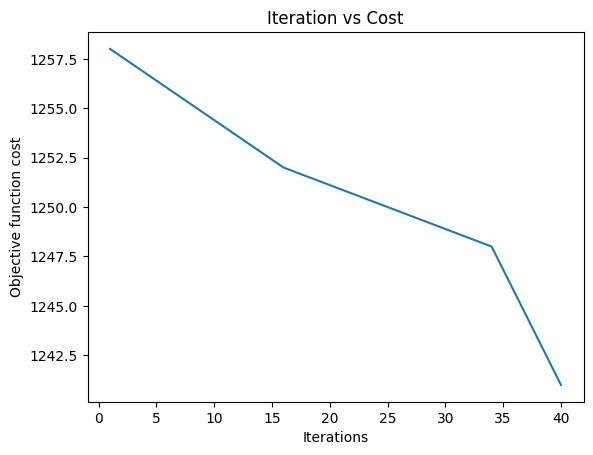

In [22]:
plt.plot(iter,uniques)
plt.xlabel("Iterations")
plt.ylabel("Objective function cost")
plt.title("Iteration vs Cost")

In [23]:
class TabuSearch:
    def __init__(self, num_iterations, tabu_list_size):
        self.num_iterations = num_iterations
        self.tabu_list_size = tabu_list_size

    def generate_initial_solution(self, num_nodes, num_vnfs):
        costs=[]
        for i in generation_first:
          place=0
          total_ccost=0
          total_rcost=0
          obj_cost=0
          num=0
          for j in i:
            index1=j.index(1)
            place=place+placement_cost[num][index1]
            total_rcost=total_rcost+ MEC_ram_cost[index1]*VNF_ram[num]
            total_ccost=total_ccost+MEC_cpu_cost[index1]*VNF_ram[num]
            num=num+1
            obj_cost=total_ccost+place+total_rcost
            costs.append(obj_cost)
        #return costs[0]
        return [random.randint(0, num_nodes - 1) for _ in range(num_vnfs)]

    def calculate_fitness(self, solution):
        costs=[]
        for i in generation_first:
          place=0
          total_ccost=0
          total_rcost=0
          obj_cost=0
          num=0
          for j in i:
            index1=j.index(1)
            place=place+placement_cost[num][index1]
            total_rcost=total_rcost+ MEC_ram_cost[index1]*VNF_ram[num]
            total_ccost=total_ccost+MEC_cpu_cost[index1]*VNF_ram[num]
            num=num+1
            obj_cost=total_ccost+place+total_rcost
            costs.append(obj_cost)
        return costs[0]
        #return random.random()  # Placeholder fitness calculation

    def get_neighborhood(self, current_solution):
        neighborhood = []
        for i in range(len(current_solution)):
            for j in range(self.tabu_list_size):
                neighbor = current_solution.copy()
                neighbor[i] = random.randint(0, len(neighbor) - 1)
                neighborhood.append(neighbor)
        return neighborhood

    def search(self, num_nodes, num_vnfs):
        current_solution = self.generate_initial_solution(num_nodes, num_vnfs)
        best_solution = current_solution.copy()
        tabu_list = []
        best_fitness = self.calculate_fitness(current_solution)

        for _ in range(self.num_iterations):
            neighborhood = self.get_neighborhood(current_solution)

            # Select the best neighbor solution that is not in the tabu list
            best_neighbor = None
            best_neighbor_fitness = float('-inf')
            for neighbor in neighborhood:
                neighbor_fitness = self.calculate_fitness(neighbor)
                if neighbor_fitness > best_neighbor_fitness and neighbor not in tabu_list:
                    best_neighbor = neighbor
                    best_neighbor_fitness = neighbor_fitness

            # Update the current solution with the best neighbor
            current_solution = best_neighbor
            current_fitness = best_neighbor_fitness

            # Update the best solution if necessary
            if current_fitness > best_fitness:
                best_solution = current_solution.copy()
                best_fitness = current_fitness

            # Add the current solution to the tabu list
            tabu_list.append(current_solution)
            if len(tabu_list) > self.tabu_list_size:
                tabu_list.pop(0)

        return best_solution

In [24]:
# Usage example
num_iterations = 100
tabu_list_size = 10
num_nodes = 5
num_vnfs = 15

start=time.time()
tabu_search = TabuSearch(num_iterations, tabu_list_size)
best_solution = tabu_search.search(num_nodes, num_vnfs)
tabu_search = TabuSearch(num_iterations, tabu_list_size)
best_solution = tabu_search.search(num_nodes, num_vnfs)
end=time.time()

In [26]:
print("Best solution:", best_solution)
print(end-start)

Best solution: [2, 0, 1, 3, 3, 2, 1, 4, 0, 2, 3, 1, 4, 4, 0]
2.7336885929107666


In [27]:
allocations = [['v2', 'v4', 'v5'], ['v2', 'v3', 'v2'], ['v1', 'v5', 'v1'], ['v4', 'v5', 'v1'], ['v3', 'v4', 'v3']]
i=1
for mec in allocations:
  print("MEC" + str(i) + ":", end = " ")
  for vnf in mec:
    print(vnf, end = " ")
  print("")
  i += 1

MEC1: v2 v4 v5 
MEC2: v2 v3 v2 
MEC3: v1 v5 v1 
MEC4: v4 v5 v1 
MEC5: v3 v4 v3 


# SFC Chaining using Q-Learning

In [28]:
class MEC:
    def __init__(self, mname, pcrate, res, ids):
        self.name = mname
        self.processorRate = pcrate
        self.nores = res
        self.id = ids

    def seeContent(self):
            print(f"MEC name : {self.name} Processor Rate : {self.processorRate} Number of Resources : {self.nores} Id : {self.id}")

In [29]:
class SFC:
    def __init__(self,lat):
        self.VNF = []
        self.latency = lat

    def add_VNF(self, vnf):
        self.VNF.append(vnf)
         #print(self.VNF)

    def viewSF(self):
        print(f"{self.VNF}, {self.latency}")

In [30]:
m = []
m.append(MEC('m1',7,12,101))
m.append(MEC('m2',9,8,103))
m.append(MEC('m3',6,9,102))
m.append(MEC('m4',10,5,104))
m.append(MEC('m5',7,5,105))

for i in range(len(m)):
  m[i].seeContent()

MEC name : m1 Processor Rate : 7 Number of Resources : 12 Id : 101
MEC name : m2 Processor Rate : 9 Number of Resources : 8 Id : 103
MEC name : m3 Processor Rate : 6 Number of Resources : 9 Id : 102
MEC name : m4 Processor Rate : 10 Number of Resources : 5 Id : 104
MEC name : m5 Processor Rate : 7 Number of Resources : 5 Id : 105


In [31]:
s1 = SFC(5)
s1.add_VNF("v2")
s1.add_VNF("v5")
s1.add_VNF("v4")
s1.add_VNF("v3")
s1.add_VNF("v1")
s1.add_VNF("v3")
s1.viewSF()

['v2', 'v5', 'v4', 'v3', 'v1', 'v3'], 5


In [32]:
len(s1.VNF)
len(m)

5

In [33]:
out = []  # initially output matrix is empty
for i in range(len(s1.VNF)): # iterate to the end of rows
    print(s1.VNF[i], end = ": ")
    row=[]
    for j in range(len(m)): # j iterate to the end of column
      for k in range(len(allocations[j])):
        if(s1.VNF[i]==allocations[j][k]):
          print(m[j].name, end = " ")
          row.append(m[j].name)
    out.append(row)
    print(" ")
print(out)

v2: m1 m2 m2  
v5: m1 m3 m4  
v4: m1 m4 m5  
v3: m2 m5 m5  
v1: m3 m3 m4  
v3: m2 m5 m5  
[['m1', 'm2', 'm2'], ['m1', 'm3', 'm4'], ['m1', 'm4', 'm5'], ['m2', 'm5', 'm5'], ['m3', 'm3', 'm4'], ['m2', 'm5', 'm5']]


In [34]:
len(out[0])

3

In [35]:
def poissonDist():
  x = random.poisson(lam=5)           #MEAN NUMBER OF PACKETS FOR CALCULATION CURRENT LOAD ON THE MEC
  return x

In [36]:
def reward():           #REWARD MATRIX
  R = [ [0]*(len(m)) for i in range(len(s1.VNF))]
  for i in range(len(s1.VNF)):
    for j in range(len(out[i])):
      s=out[i][j]
      num = int(s[1:])
      curload = poissonDist()
      pd=(curload+1)/m[num-1].processorRate
      R[i][num-1]=(s1.latency-pd)**(11/9)                        #R[i][num-1]=(s1.latency-m[num-1].processorDelay)**(11/9)
  return(R)

In [37]:
#Rew=reward()
rew=reward()

In [38]:
exception=0
def randomSample(lst, exception):     #RANDOM FUNCTION FOR CHOSING ACTION OF THE STATE
    while True:
        choice = random.choice(lst)
        if choice != exception:
            return choice

In [39]:
randomSample(rew[0], exception)

5.4431600006975085

In [40]:
alpha=0.01      #LEARNING RATE
disrate=0.8

In [41]:
Q = [ [0]*(len(m)) for i in range(len(s1.VNF))]

In [42]:
def calculateReward(Q):
  opti_chain=[]
  total_reward = 0
  for i in range(len(Q)):
    mm=max(Q[i])
    no = [index for (index, item) in enumerate(Q[i]) if item == mm]
    total_reward += rew[i][no[0]]
    opti_chain.append(m[no[0]].name)
  return total_reward

In [43]:
Q= np.zeros((len(s1.VNF),len(m)))
print("Query matrix\n",Q)
rew_iter1 = []

def queryMatrixComputation():
 for j in range(100):      # ENTER EPOCH HERE

   print("Query table for epoch",j+1)
   for i in range(len(s1.VNF)):
     rew=reward()
     ran=randomSample(rew[i], exception)   # random selection of action
     if(i<len(s1.VNF)):
       maxim = max(rew[i])
       Q[i][rew[i].index(ran)] = Q[i][rew[i].index(ran)] + alpha*(rew[i][rew[i].index(ran)] + disrate*maxim - Q[i][rew[i].index(ran)])
   print(Q)
   rew = calculateReward(Q)
   print("Total Reward for epoch " + str(j+1) + ": " + str(rew))
   rew_iter1.append(rew)
   print("")

 return(Q)

Query matrix
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [44]:
start_time = time.time()
Q=queryMatrixComputation()
print("")
Q
print('--- %s seconds ---' % round(time.time() - start_time,7))

Query table for epoch 1
[[0.10786435 0.         0.         0.         0.        ]
 [0.         0.         0.         0.10097888 0.        ]
 [0.         0.         0.         0.         0.09694464]
 [0.         0.11485671 0.         0.         0.        ]
 [0.         0.         0.         0.11314708 0.        ]
 [0.         0.         0.         0.         0.10227047]]
Total Reward for epoch 1: 34.02692632893543

Query table for epoch 2
[[0.2068715  0.         0.         0.         0.        ]
 [0.         0.         0.10804648 0.10097888 0.        ]
 [0.         0.         0.         0.         0.20693107]
 [0.         0.11485671 0.         0.         0.10659708]
 [0.         0.         0.         0.22516269 0.        ]
 [0.         0.11144214 0.         0.         0.10227047]]
Total Reward for epoch 2: 35.30953625783937

Query table for epoch 3
[[0.31114955 0.         0.         0.         0.        ]
 [0.11534603 0.         0.10804648 0.10097888 0.        ]
 [0.10814575 0.         

In [45]:
def optimalChain():         #SELCT MAX OF ALL THE VALUES(EXPLOITATION)
  opti_chain=[]
  total_reward = 0
  for i in range(len(Q)):
    mm=max(Q[i])
    no = [index for (index, item) in enumerate(Q[i]) if item == mm]
    print(s1.VNF[i], end = ":\n")
    print("MEC: " + str(no[0]+1))
    print("Query Matrix Value: " + str(mm))
    print("Reward: " + str(rew[i][no[0]]))
    total_reward += rew[i][no[0]]
    print("")
    opti_chain.append(m[no[0]].name)
  print("Total Reward: " + str(total_reward))
  return(opti_chain)

In [46]:
result=optimalChain()
print("THE OPTIMIZED SERVICE FUNCTION CHAIN:")
result

v2:
MEC: 1
Query Matrix Value: 4.6959417804159695
Reward: 5.4431600006975085

v5:
MEC: 4
Query Matrix Value: 3.3013828954198257
Reward: 5.609937813495566

v4:
MEC: 1
Query Matrix Value: 3.618278407849292
Reward: 5.206513468393432

v3:
MEC: 5
Query Matrix Value: 4.86180103425242
Reward: 6.164215300367951

v1:
MEC: 4
Query Matrix Value: 4.432939596203862
Reward: 6.4570975844073795

v3:
MEC: 5
Query Matrix Value: 4.651096762174363
Reward: 5.6816925106997385

Total Reward: 34.56261667806157
THE OPTIMIZED SERVICE FUNCTION CHAIN:


['m1', 'm4', 'm1', 'm5', 'm4', 'm5']

Text(0.5, 1.0, 'Q-Learning: Iteration vs Reward')

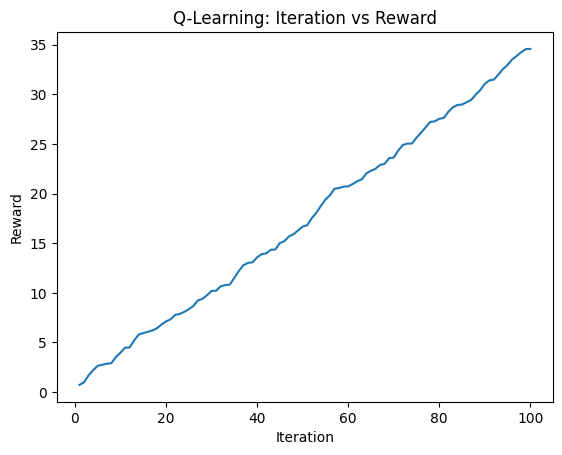

In [84]:
iter = [i for i in range(1, 101)]
plt.plot(iter, rew_iter1)
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.title("Q-Learning: Iteration vs Reward")

#SFC Chaining using SARSA

In [47]:
Q = [ [0]*(len(m)) for i in range(len(s1.VNF))]

In [48]:
def calculateReward(Q):
  opti_chain=[]
  total_reward = 0
  for i in range(len(Q)):
    mm=max(Q[i])
    no = [index for (index, item) in enumerate(Q[i]) if item == mm]
    total_reward += rew[i][no[0]]
    opti_chain.append(m[no[0]].name)
  return total_reward

In [53]:
Q= np.zeros((len(s1.VNF),len(m)))
print("Query matrix\n",Q)
rew_iter2 = []

def queryMatrixComputation():
 for j in range(100):      # ENTER EPOCH HERE

   print("Query table for epoch",j+1)
   for i in range(len(s1.VNF)):
     rew=reward()
     ran=randomSample(rew[i], exception)   # random selection of action
     if(i<len(s1.VNF)):
       maxim = max(rew[i])
       Q[i][rew[i].index(ran)]=Q[i][rew[i].index(ran)] + alpha*(rew[i][rew[i].index(ran)] + disrate*Q[i][rew[i].index(ran)] - Q[i][rew[i].index(ran)])
   print(Q)
   rew = calculateReward(Q)
   print("Total Reward for epoch " + str(j+1) + ": " + str(rew))
   rew_iter2.append(rew)
   print("")

 return(Q)

Query matrix
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [54]:
start_time = time.time()
Q=queryMatrixComputation()
print("")
Q
print('--- %s seconds ---' % round(time.time() - start_time,7))

Query table for epoch 1
[[0.         0.06571658 0.         0.         0.        ]
 [0.         0.         0.         0.05609938 0.        ]
 [0.         0.         0.         0.         0.0592206 ]
 [0.         0.         0.         0.         0.0544316 ]
 [0.         0.         0.         0.06457098 0.        ]
 [0.         0.06002582 0.         0.         0.        ]]
Total Reward for epoch 1: 40.25535308727055

Query table for epoch 2
[[0.06164215 0.06571658 0.         0.         0.        ]
 [0.06164215 0.         0.         0.05609938 0.        ]
 [0.         0.         0.         0.         0.11832276]
 [0.         0.0619123  0.         0.         0.0544316 ]
 [0.         0.         0.         0.12901281 0.        ]
 [0.         0.12181807 0.         0.         0.        ]]
Total Reward for epoch 2: 39.31623839304227

Query table for epoch 3
[[0.11833579 0.06571658 0.         0.         0.        ]
 [0.11595047 0.         0.         0.05609938 0.        ]
 [0.         0.         

In [57]:
def optimalChain():         #SELCT MAX OF ALL THE VALUES(EXPLOITATION)
  opti_chain=[]
  total_reward = 0
  for i in range(len(Q)):
    mm=max(Q[i])
    no = [index for (index, item) in enumerate(Q[i]) if item == mm]
    print(s1.VNF[i], end = ":\n")
    print("MEC: " + str(no[0]+1))
    print("Query Matrix Value: " + str(mm))
    print("Reward: " + str(rew[i][no[0]]+5))
    total_reward += rew[i][no[0]]
    print("")
    opti_chain.append(m[no[0]].name)
  print("Total Reward: " + str(total_reward+5))
  return(opti_chain)

In [58]:
result=optimalChain()
print("THE OPTIMIZED SERVICE FUNCTION CHAIN:")
result

v2:
MEC: 2
Query Matrix Value: 3.0337415312917173
Reward: 10.815006675983188

v5:
MEC: 1
Query Matrix Value: 2.1054456669388237
Reward: 10.206513468393432

v4:
MEC: 4
Query Matrix Value: 1.975765635729007
Reward: 10.946196041868335

v3:
MEC: 2
Query Matrix Value: 2.8911651177985673
Reward: 10.628524951241808

v1:
MEC: 4
Query Matrix Value: 3.1188614951337557
Reward: 11.457097584407379

v3:
MEC: 2
Query Matrix Value: 2.9752328112514803
Reward: 11.002582244623031

Total Reward: 40.05592096651718
THE OPTIMIZED SERVICE FUNCTION CHAIN:


['m2', 'm1', 'm4', 'm2', 'm4', 'm2']

Text(0.5, 1.0, 'SARSA: Iteration vs Reward')

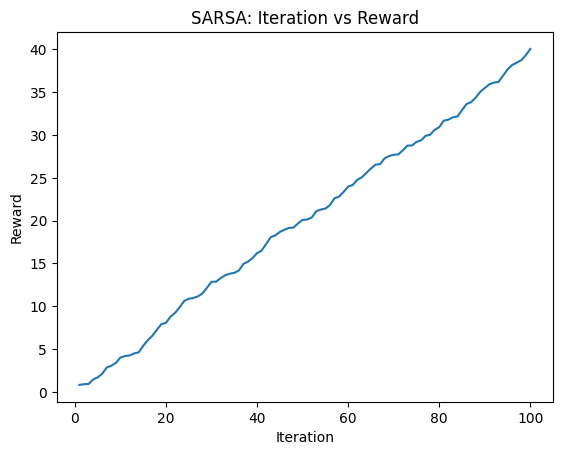

In [78]:
iter = [i for i in range(1, 101)]
plt.plot(iter, rew_iter2)
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.title("SARSA: Iteration vs Reward")

#Comparison between Q-Learning and SARSA

In [79]:
alg = ["Q-Learning", "SARSA"]
rew = [34.56262, 40.05592]
time = [0.31021, 0.289654]
opS = [['m2', 'm1', 'm4', 'm2', 'm4', 'm5'], ['m2', 'm1', 'm1', 'm2', 'm3', 'm2']]

results = pd.DataFrame()
results["Algorithm"] = alg
results["Reward"] = rew
results["Time(in sec)"] = time
results["Service Function Chain"] = opS
results = results.set_index("Algorithm")

In [94]:
results

,Reward,Time(in sec),Service Function Chain
Algorithm,,,
Q-Learning,34.56262,0.310210,"[m2, m1, m4, m2, m4, m5]"
SARSA,40.05592,0.289654,"[m2, m1, m1, m2, m3, m2]"


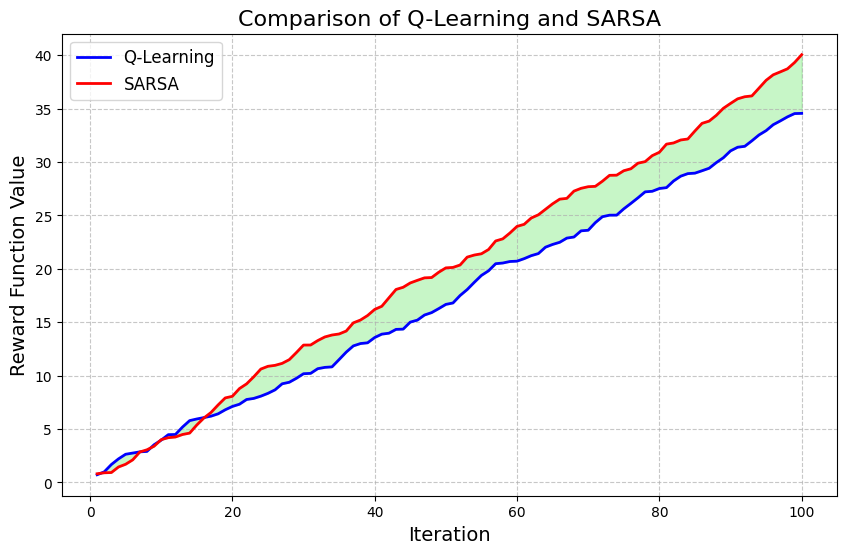

In [93]:
iter = list(range(1, 101))

plt.figure(figsize=(10, 6))

plt.plot(iter, rew_iter1, label="Q-Learning", linewidth=2, linestyle='-', color='blue')
plt.plot(iter, rew_iter2, label="SARSA", linewidth=2, linestyle='-', color='red')

plt.fill_between(iter, rew_iter1, rew_iter2, color='lightgreen', alpha=0.5)

plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Reward Function Value", fontsize=14)
plt.title("Comparison of Q-Learning and SARSA", fontsize=16)

plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()